# Explore here

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt

data_dir= "../data/raw/train/ccat"

imagenes = os.listdir(data_dir)

In [23]:
from tensorflow import keras
from keras.preprocessing import image

img = []

for i in range(9):
    img_path = os.path.join(data_dir,imagenes[i])
    imagen = image.load_img(img_path)
    img_array = image.img_to_array(imagen)
    img_array /= 255
    img.append(img_array)
  

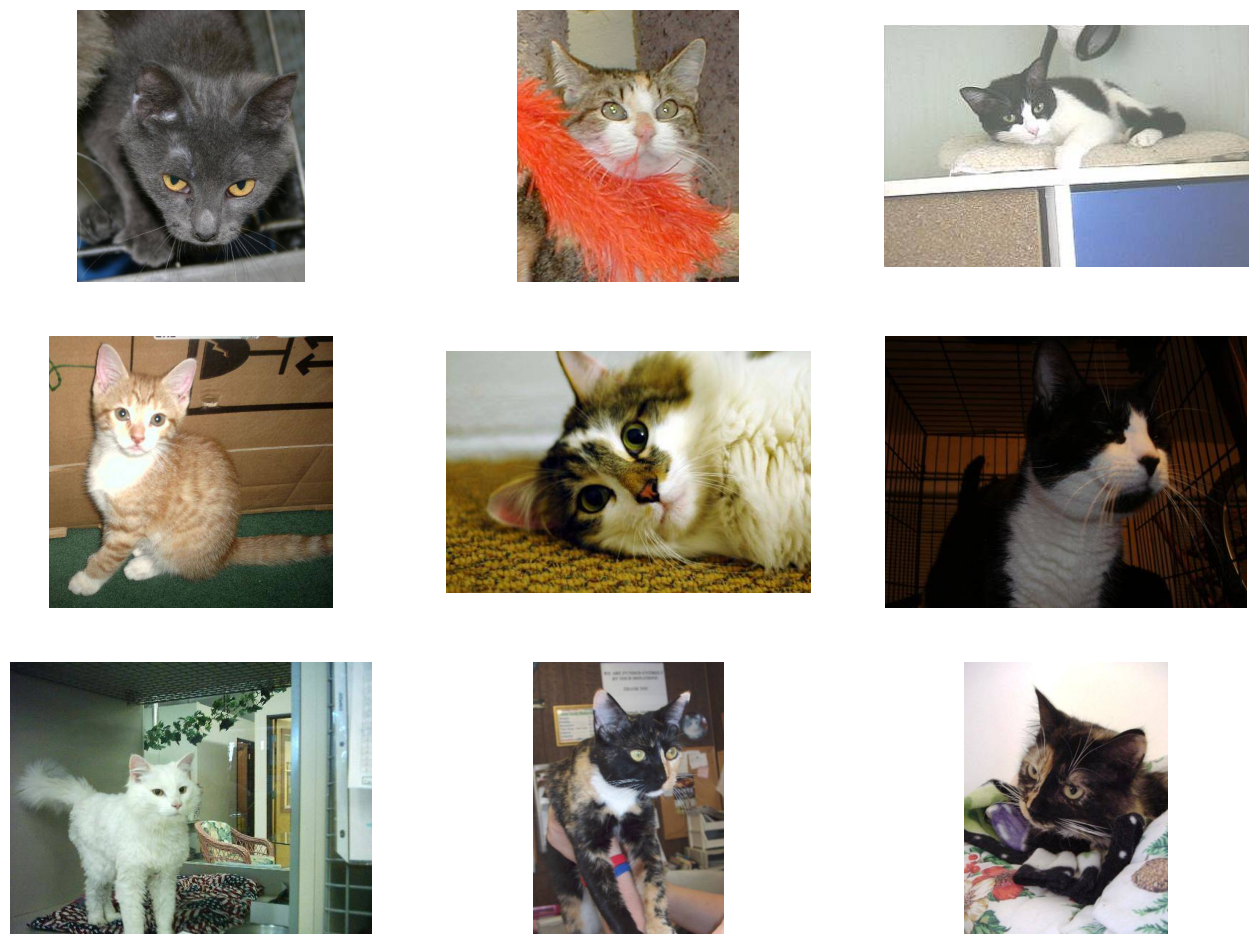

In [24]:
plt.figure(figsize=(16,12))

for i in range(9):

    plt.subplot(3,3,i+1)
    plt.imshow(img[i])
    plt.axis("off")
    

In [25]:
from keras.preprocessing.image import ImageDataGenerator

dir_train= "../data/raw/train"
dir_test= "../data/raw"
image_size= (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

data_train = datagentrain.flow_from_directory(
    dir_train,
    target_size = image_size,
    classes = ["cdog","ccat"]

)

data_test = datagentrain.flow_from_directory(
    dir_test,
    target_size = image_size,
    classes = ["test1"]
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [34]:
for im in imagenes:
     img_path = os.path.join(data_dir, im)
     if "dog." in im:
           mv_path= os.path.join(data_dir, "cdog", im)
     elif "cat."in im:
           mv_path= os.path.join(data_dir, "ccat", im)
     os.system("mv "+ img_path+" "+mv_path)

mv: cannot stat '../data/raw/train/dog.3446.jpg': No such file or directory
mv: cannot stat '../data/raw/train/dog.12214.jpg': No such file or directory
mv: cannot stat '../data/raw/train/dog.8577.jpg': No such file or directory
mv: cannot stat '../data/raw/train/cat.832.jpg': No such file or directory
mv: cannot stat '../data/raw/train/dog.5672.jpg': No such file or directory
mv: cannot stat '../data/raw/train/dog.3476.jpg': No such file or directory
mv: cannot stat '../data/raw/train/cat.9862.jpg': No such file or directory
mv: cannot stat '../data/raw/train/cat.9162.jpg': No such file or directory
mv: cannot stat '../data/raw/train/dog.5609.jpg': No such file or directory
mv: cannot stat '../data/raw/train/dog.10601.jpg': No such file or directory
mv: cannot stat '../data/raw/train/dog.12150.jpg': No such file or directory
mv: cannot stat '../data/raw/train/dog.12398.jpg': No such file or directory
mv: cannot stat '../data/raw/train/dog.3946.jpg': No such file or directory
mv: canno

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

model.add(Conv2D(input_shape=(200, 200, 3), filters=64, kernel_size=(3,3),padding="same", activation = "relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="same", activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2), strides= (2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="same", activation = "relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="same", activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2), strides= (2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3),padding="same", activation = "relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3),padding="same", activation = "relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3),padding="same", activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2), strides= (2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3),padding="same", activation = "relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3),padding="same", activation = "relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3),padding="same", activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2), strides= (2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3),padding="same", activation = "relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3),padding="same", activation = "relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3),padding="same", activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2), strides= (2,2)))

model.add(Flatten())
model.add(Dense(units=4096, activation= "relu"))
model.add(Dense(units=4096, activation= "relu"))
model.add(Dense(units=2, activation="softmax"))

In [27]:
from keras.optimizers import Adam
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam (learning_rate=0.001), metrics=["accuracy"])

In [10]:
model.fit(data_train, epochs=2)

Epoch 1/2
782/782 [==============================] - 3709s 5s/step - loss: 27.0278 - accuracy: 0.5008
Epoch 2/2
782/782 [==============================] - 3701s 5s/step - loss: 0.6933 - accuracy: 0.4980


In [28]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(data_train, steps_per_epoch = 100, validation_data = data_test, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

Epoch 1/3
100/100 [==============================] - ETA: 0s - loss: 27.9270 - accuracy: 0.4984
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to ../models/vgg16_1.h5


/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 493s 5s/step - loss: 27.9270 - accuracy: 0.4984 - val_loss: 1.3865 - val_accuracy: 1.0000
Epoch 2/3
100/100 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5069
Epoch 2: val_accuracy did not improve from 1.00000
100/100 [==============================] - 489s 5s/step - loss: 0.6932 - accuracy: 0.5069 - val_loss: 1.3870 - val_accuracy: 0.0000e+00
Epoch 3/3
100/100 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.5044
Epoch 3: val_accuracy did not improve from 1.00000
100/100 [==============================] - 490s 5s/step - loss: 0.6934 - accuracy: 0.5044 - val_loss: 1.3865 - val_accuracy: 1.0000


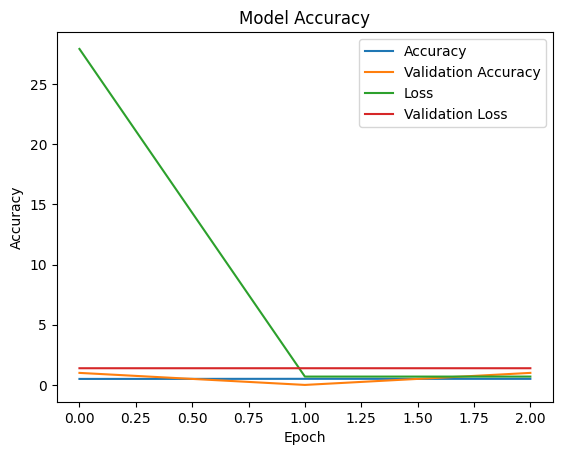

In [29]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

1/1 [==============================] - 0s 158ms/step
cat


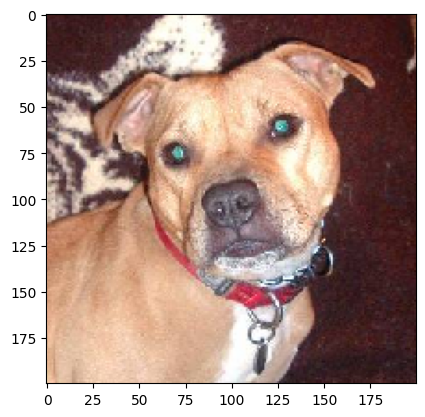

In [32]:
from keras.models import load_model
from tensorflow import keras
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img = image.load_img("../data/raw/test1/2.jpg", target_size = (220, 220))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")